# Starting Point

In [ ]:
# Upload timeseries
from google.colab import files
upl = files.upload()

Saving Electric_Production.csv to Electric_Production.csv


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data
df = pd.read_csv('Electric_Production.csv')
# display data
df.head(3)

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502


In [ ]:
# check for missing data
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

Great! no missing data.

Just like any other dataset, checking for missing data within the dataset is a standard to take.

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


From the output it we can see the date feature is of object type as such we will change it to datetime formate, in addition, the target feature name(IPG2211A2N) is a bit obnoxious so we'll change it to something much easier to read

In [ ]:
# Convert to Datetime
df['DATE'] = pd.to_datetime(df['DATE'])
# rename target
df.rename(columns={'IPG2211A2N': 'Value'}, inplace=True)
# display updated dataset
df.head(3)

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502


# Visualizations

After all, we gotta see some shiny plots :)

Skewness: -0.073096
Kurtosis: -0.694201


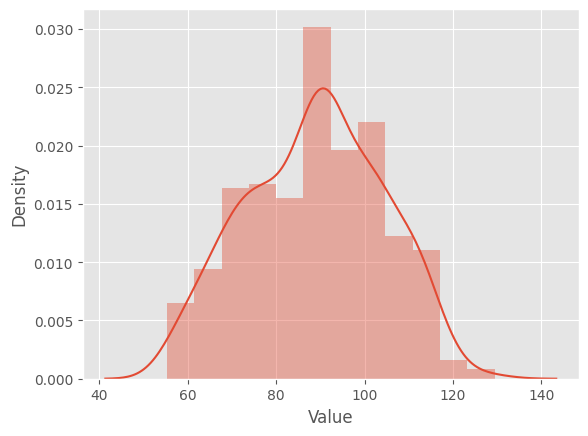

In [ ]:
# value distribution
sns.distplot(df['Value'])
#skewness and kurtosis of target
print("Skewness: %f" % df['Value'].skew())
print("Kurtosis: %f" % df['Value'].kurt())

From the skewness values, its depicted that the distribution of the electric values are sligthly left-skewed, as for our kurtosis value, the distribution is light tailed(implying a small variance), once again very very slightly.

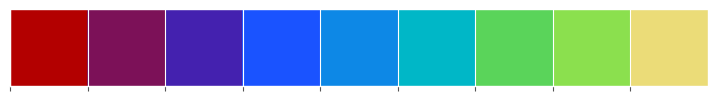

In [ ]:
# color scheme
river_nights = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
# color palates
sns.palplot(river_nights)

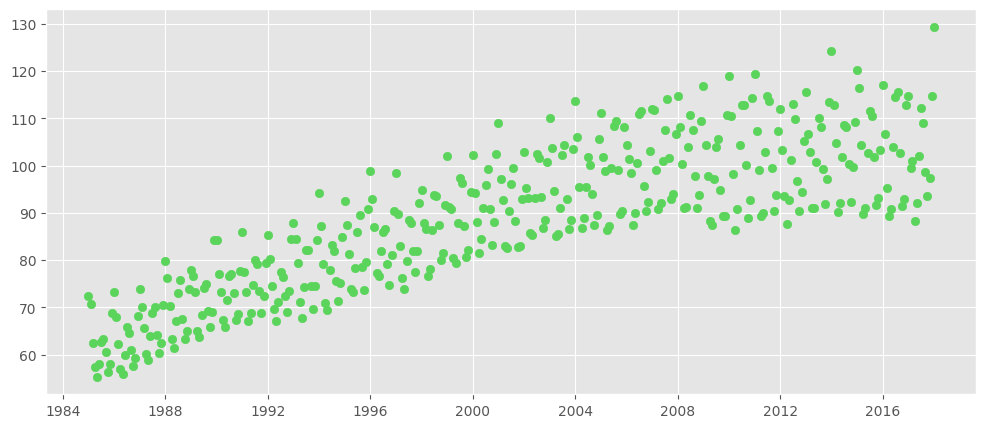

In [ ]:
# scatter plot of date and electric values
plt.figure(figsize=(12,5))
plt.scatter(df['DATE'],df['Value'],color=river_nights[6])

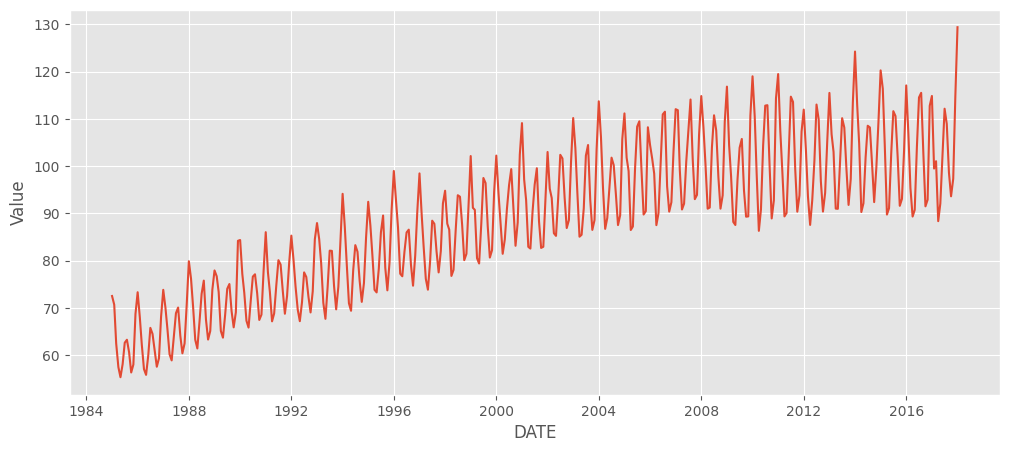

In [ ]:
# line plot of date and electric value
plt.figure(figsize=(12,5))
sns.lineplot(x = 'DATE' ,y = 'Value',data = df,palette = river_nights[5]);

There seems to some sort of upward trend in the data. Let's ask the experts: **Rolling mean**.

In [ ]:
# make date the index
df = df.set_index(['DATE'])
# get rolling mean and standard deviation
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()
# display results
# print('The rolling mean:', rolling_mean)
# print('The rolling std:', rolling_std)

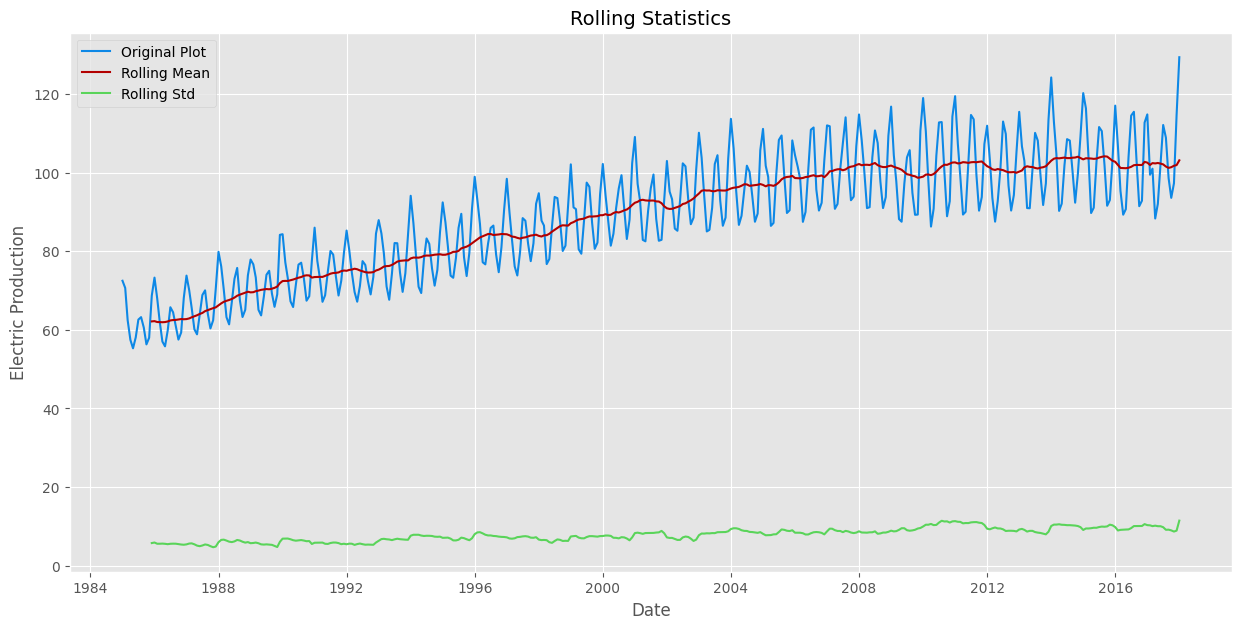

In [ ]:
#plot original mean
plt.figure(figsize = (15,7))
plt.plot(df, color=river_nights[4], label='Original Plot')
# plot rolling mean and std
plt.plot(rolling_mean, color=river_nights[0], label='Rolling Mean')
plt.plot(rolling_std, color=river_nights[6], label='Rolling Std')
# labels
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Rolling Statistics', size = 14)
plt.show()

# Testing for Stationarity: ADF



**Augmented Dickey-Fuller** Test is a common statistical test used to test whether a given time series is stationary or not. We can achieve this by defining the null and alternate hypothesis.

**Null Hypothesis**: Time Series is non-stationary. It gives a time-dependent trend.

**Alternate Hypothesis**: Time Series is stationary. In another term, the series doesn’t depend on time.

The **ADF Statistic** is a negative number in that the more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

**ADF or t Statistic < critical values**: Reject the null hypothesis, time series is stationary.

**ADF or t Statistic > critical values**: Failed to reject the null hypothesis, time series is non-stationary.

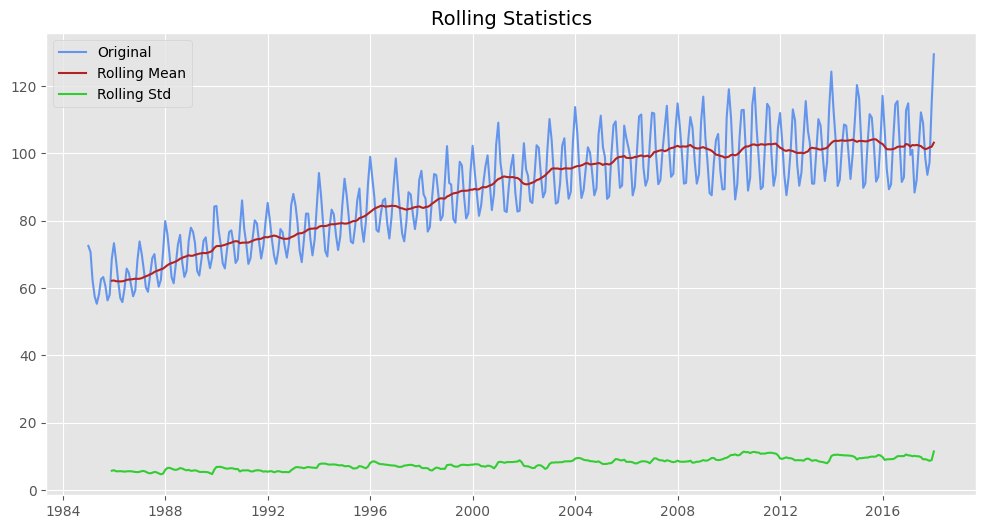

The ADF statistic: -2.256990350047235
The P_value: 0.1862146911658712
Critical values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181} 

ADF > Critical Values
Failed to reject null hypothesis, time series is non-stationary.


In [ ]:
# import adfuller from statsmodels
from statsmodels.tsa.stattools import adfuller
def adf_test(ts_data):
  movingAverage = ts_data.rolling(window=12).mean()
  movingSTD = ts_data.rolling(window=12).std()
  
  plt.figure(figsize = (12,6))
  orig = plt.plot(ts_data, color='cornflowerblue',
                  label='Original')
  mean = plt.plot(movingAverage, color='firebrick',
                  label='Rolling Mean')
  std = plt.plot(movingSTD, color='limegreen',
                  label='Rolling Std')
  plt.legend(loc = 'upper left')
  plt.title('Rolling Statistics', size = 14)
  plt.show(block=False)
  adf = adfuller(ts_data)
  # ADF staticical value
  print('The ADF statistic:',adf[0])
  # p-value
  print('The P_value:',adf[1])

  # critical values are contained in a dictionary
  print('Critical values:',adf[4],'\n')

  # stationarity check
  if adf[0] > adf[4]["5%"]:
      print("ADF > Critical Values")
      print ("Failed to reject null hypothesis, time series is non-stationary.")
  else:
      print("ADF < Critical Values")
      print ("Reject null hypothesis, time series is stationary.")
        
adf_test(df)

The p-value is very large than the significance level of 0.05 and as such there is no reason toreject the null hypothesis. The series is **not Stationary** 


# Converting to Stationary

## Log transformation using box cox

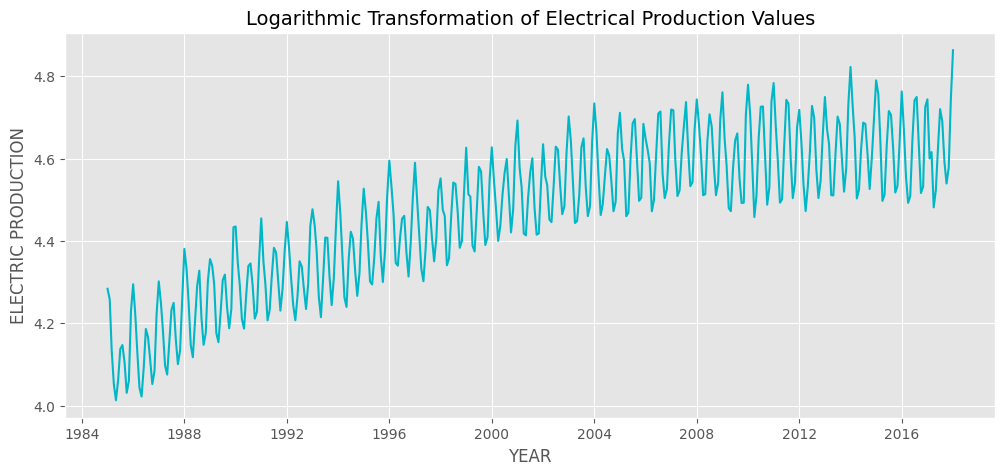

In [ ]:
from scipy.stats import boxcox # import box cox

log_df = df # replicate df
# transform
log_df['Value'] = boxcox(log_df['Value'],lmbda=0.0)
# plot transformed data
plt.figure(figsize = (12,5))
plt.plot(log_df, color = river_nights[5])
plt.xlabel('YEAR')
plt.ylabel('ELECTRIC PRODUCTION')
plt.title("Logarithmic Transformation of Electrical Production Values", size = 14)
plt.show()


**Log transformation** can be used to stabilize the variance of a series with non-constant variance. 
Taking a log shrinks the values towards 0. For values that are close to 1, the shrinking is less and for the values that are higher, the shrinking is more, thus reducing the variance.

The **Box-Cox transform** is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

The **boxcox()** function takes an argument, called lambda, that controls the type of transform to perform.
- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

## Detrending : *Removing trends from time series data*

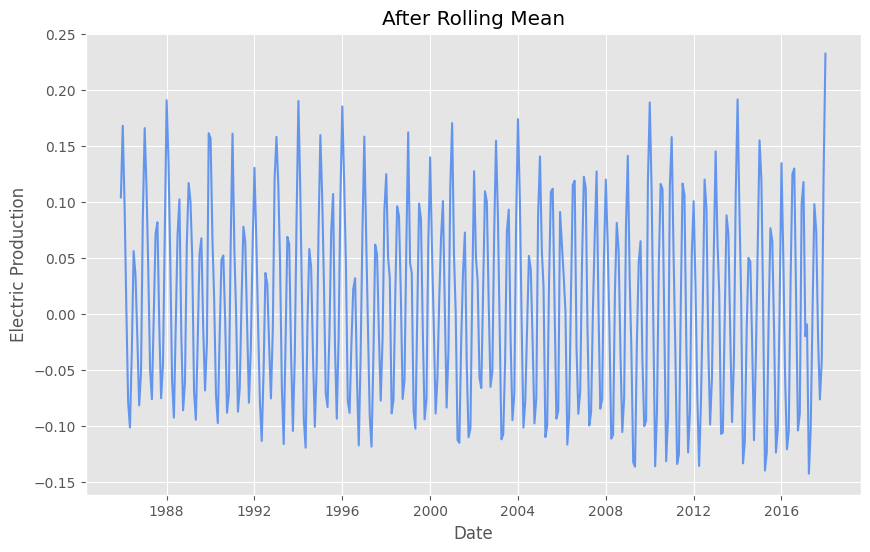

In [ ]:
moving_avg = log_df.rolling(window=12).mean() # get rolling mean
df_detrend = log_df - moving_avg
df_detrend.dropna(inplace=True)
# plot rolling mean
plt.figure(figsize = (10,6))
plt.plot(df_detrend, color = 'cornflowerblue')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title("After Rolling Mean")
plt.show()

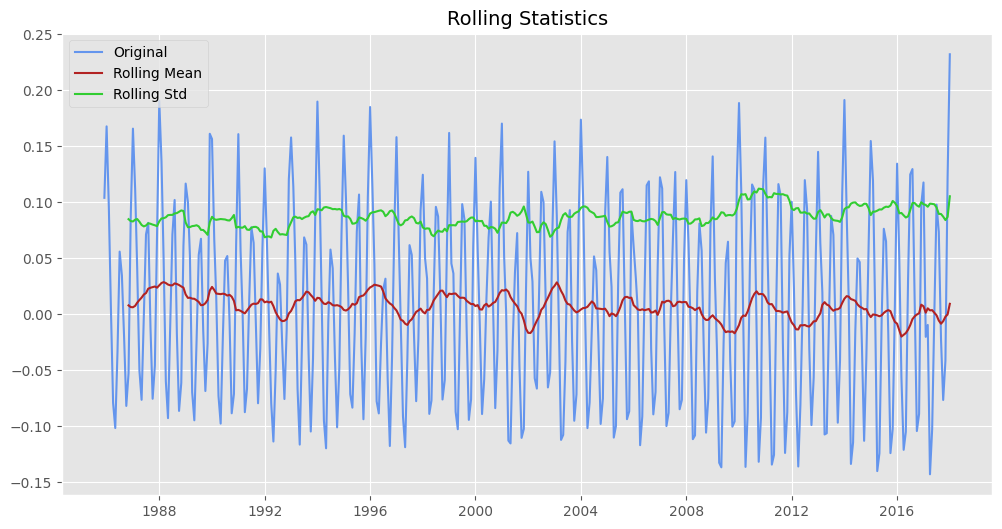

The ADF statistic: -5.2115861853654355
The P_value: 8.32563975994627e-06
Critical values: {'1%': -3.448147967010838, '5%': -2.8693833397824413, '10%': -2.5709483564645725} 

ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [ ]:
# check stationarity
adf_test(df_detrend)

# Decomposition

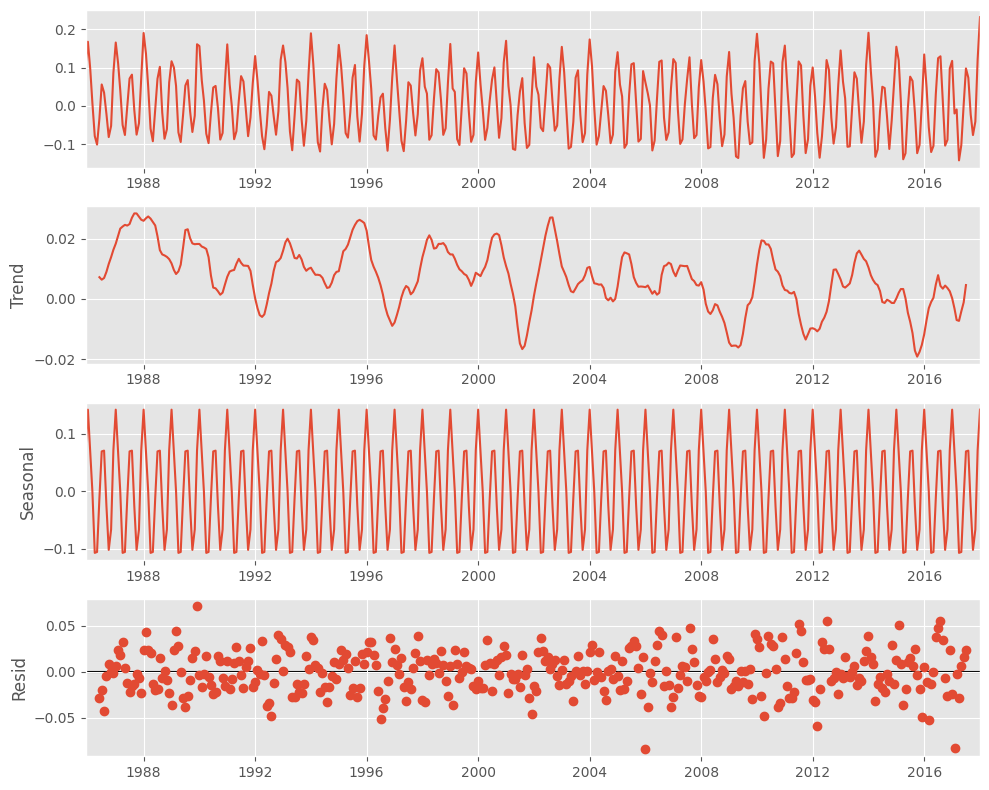

In [ ]:
# import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
df_season = seasonal_decompose(df_detrend,model='additive')
rcParams['figure.figsize']=10,8
df_season.plot()
plt.show()

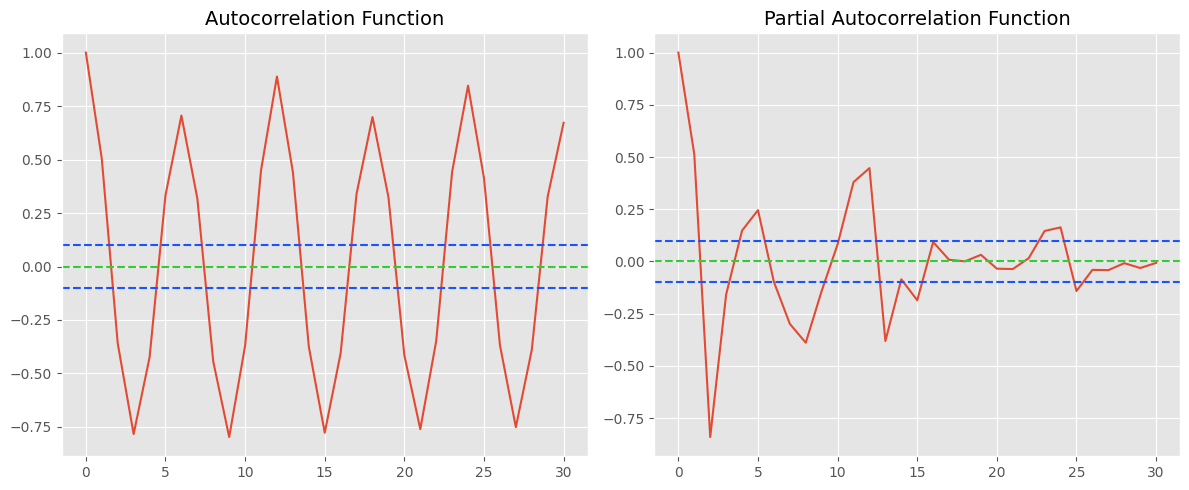

In [ ]:
# import acf
from statsmodels.tsa.stattools import acf,pacf
auto_c_f = acf(df_detrend, nlags=30)
partial_auto_c_f = pacf(df_detrend, nlags=30, method='ols')

fig, axs = plt.subplots(1, 2, figsize =(12,5))

plt.subplot(121)
plt.plot(auto_c_f)
plt.axhline(y=0, linestyle='--', color='limegreen')
plt.axhline(y=-1.96/np.sqrt(len(df_detrend)),
            linestyle='--', color=river_nights[3])
plt.axhline(y=1.96/np.sqrt(len(df_detrend)),
            linestyle='--', color=river_nights[3])
plt.title('Autocorrelation Function', size = 14)            

plt.subplot(122)
plt.plot(partial_auto_c_f)
plt.axhline(y=0, linestyle='--', color='limegreen')
plt.axhline(y=-1.96/np.sqrt(len(df_detrend)),
            linestyle='--', color=river_nights[3])
plt.axhline(y=1.96/np.sqrt(len(df_detrend)),
            linestyle='--', color=river_nights[3])
plt.title('Partial Autocorrelation Function', size = 14)
            
plt.tight_layout() 